# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [ ]:
data = pd.read_excel('/content/Coal10_2010_2015.xlsx')

In [ ]:
data.head()

,Accident Code,Accident Reason,Date,Time,Time Range,State,Mine,District,Owner Company,No. of persons died along,Name of person,Occupation of the person,Gender of the person,Age of the person,Age Range,Reason,Remedy,Shift,SubShifts
0,111,Fall of Roof,2010-01-02,12:00:00,0-8,West Bengal,SHANKARPUR,Burdwan,Eastern Coalfields Ltd.,0,Ismail Mia,Dresser,Male,40,<50,While a dresser was engaged for dressing coal ...,Had the roof of the gallery been made and kept...,2,1C
1,111,Fall of Roof,2010-02-24,13:30:00,0-8,Madhya Pradesh,BARTARAI,Anuppur,South Eastern Coalfields Ltd.,0,Poshan Das,Support Mistry,Male,44,<50,While a driller was pulling a drilling cable a...,Had the roof of the working place been made an...,2,1D
2,111,Fall of Roof,2010-03-20,09:45:00,0-8,Chhattisgarh,BALGI PROJECT,Korba,South Eastern Coalfields Ltd.,0,Dhani Ram,Explosive Carrier,Male,47,<50,While an explosive carrier in stooping positio...,Had i) the person carefully examined his worki...,2,1B
3,111,Fall of Roof,2010-04-03,14:40:00,0-8,Madhya Pradesh,BIRSINGHPUR,Umaria,South Eastern Coalfields Ltd.,0,Daya Ram,Roof Stitcher,Male,56,>50,While a roof stitcher was drinking water from ...,Had the roof of the gallery been made and kept...,2,2A
4,111,Fall of Roof,2010-04-16,11:30:00,0-8,Chhattisgarh,RAJGAMAR 1&2 (PAWAN INCLINE ),Bilaspur,South Eastern Coalfields Ltd.,0,Kitab Singh,Cableman,Male,40,<50,While SDL reached the junction of split and or...,Had i) the working place been carefully examin...,2,1C


# Data Clearning

In [ ]:
data['Age Range'].value_counts()

<50     211
>50     158
<30      96
Name: Age Range, dtype: int64

In [ ]:
data['deaths'] = data['No. of persons died along'] + 1

In [ ]:
def shift(hr):
  if(hr == 24 or hr<8):
    return 3
  if(hr<16):
    return 1
  return 2

In [ ]:
def sub_shift(hr):
  s = (hr%8)//2
  di = {0:'A', 1:'B', 2:'C', 3:'D'}
  return f'{shift(hr)}{di[s]}'


In [ ]:
data['Date'] =  pd.to_datetime(data['Date']) + pd.to_timedelta((data['Time'].astype(str)))
data['SubShifts'] = (data['Date'].dt.hour).apply(sub_shift)
data['Shift'] = (data['Date'].dt.hour).apply(shift)

In [ ]:
def range_fun(x):
  if(x<30):
    return 'age <30'
  if(x<50):
      return '30<= age <50'
  return 'age >= 50'

In [ ]:
data['Age Range'] = data['Age of the person'].apply(range_fun)

In [ ]:
data['Accident Group'] = data['Accident Code'] //100

In [ ]:
data['Month'] = data['Date'].dt.month

In [ ]:
data['Day'] = data['Date'].dt.day

In [ ]:
data = data.drop(columns = {'Time','Gender of the person', 'Name of person', 'Time Range', 'No. of persons died along'}, axis = 1)

In [ ]:
data.head(2)

,Accident Code,Accident Reason,Date,State,Mine,District,Owner Company,Occupation of the person,Age of the person,Age Range,Reason,Remedy,Shift,SubShifts,deaths,Accident Group,Month,Day
0,111,Fall of Roof,2010-01-02 12:00:00,West Bengal,SHANKARPUR,Burdwan,Eastern Coalfields Ltd.,Dresser,40,30<= age <50,While a dresser was engaged for dressing coal ...,Had the roof of the gallery been made and kept...,1,1C,1,1,1,2
1,111,Fall of Roof,2010-02-24 13:30:00,Madhya Pradesh,BARTARAI,Anuppur,South Eastern Coalfields Ltd.,Support Mistry,44,30<= age <50,While a driller was pulling a drilling cable a...,Had the roof of the working place been made an...,1,1C,1,1,2,24


In [ ]:
print("Number of unique values in each cloumn:")
for col in data.columns:
  print(col, " : ", len(data[col].value_counts()))

Number of unique values in each cloumn:
Accident Code  :  37
Accident Reason  :  59
Date  :  429
State  :  14
Mine  :  291
District  :  42
Owner Company  :  45
Occupation of the person  :  232
Age of the person  :  42
Age Range  :  3
Reason  :  429
Remedy  :  417
Shift  :  3
SubShifts  :  12
deaths  :  4
Accident Group  :  9
Month  :  12
Day  :  31


Plot for month vs deaths


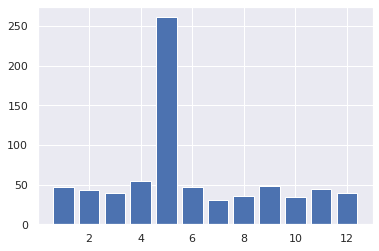

Plot for month vs accidents


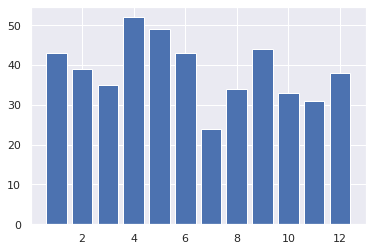

Heatmap for class of accidents vs month with the death counts.


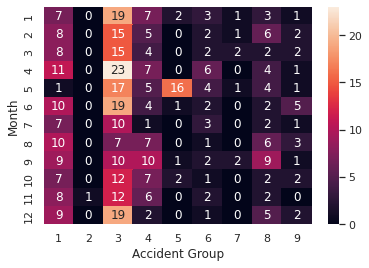

In [ ]:
mon_vs_death = {x:0 for x in range(1,13)}
mon_vs_accidents = {x:0 for x in range(1,13)}
temp1 = np.array(data['Month'])
temp2 = np.array(data['deaths'])
for i in range(len(data)):
  mon_vs_death[temp1[i]] += temp2[i]
  mon_vs_accidents[temp1[i]] += 1
print("Plot for month vs deaths")
plt.bar(list(mon_vs_death.keys()), mon_vs_death.values())
plt.show()
print("Plot for month vs accidents")
plt.bar(list(mon_vs_accidents.keys()), mon_vs_accidents.values())
plt.show()
print("Heatmap for class of accidents vs month with the death counts.")
pivot_table = pd.pivot_table(data=data, values='deaths', index='Month', columns='Accident Group', aggfunc=len, fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='g')

Plot for date vs deaths


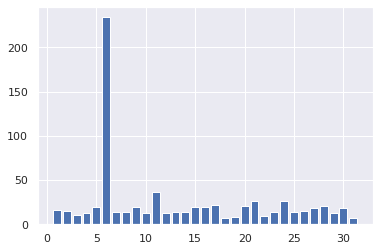

Plot for month vs accidents


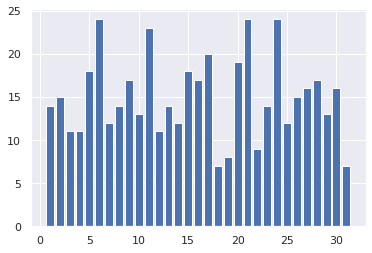

Heatmap for class of accidents vs month with the death counts.


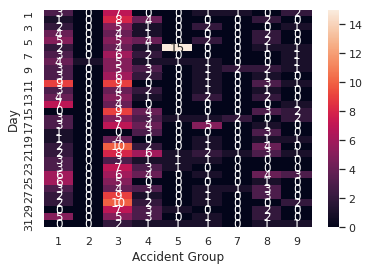

In [ ]:
date_vs_death = {x:0 for x in range(1,32)}
date_vs_accidents = {x:0 for x in range(1,32)}
temp1 = np.array(data['Day'])
temp2 = np.array(data['deaths'])
for i in range(len(data)):
  date_vs_death[temp1[i]] += temp2[i]
  date_vs_accidents[temp1[i]] += 1
print("Plot for date vs deaths")
plt.bar(list(date_vs_death.keys()), date_vs_death.values())
plt.show()
print("Plot for month vs accidents")
plt.bar(list(date_vs_accidents.keys()), date_vs_accidents.values())
plt.show()
print("Heatmap for class of accidents vs month with the death counts.")
pivot_table = pd.pivot_table(data=data, values='deaths', index='Day', columns='Accident Group', aggfunc=len, fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='g')

Plot for date vs deaths


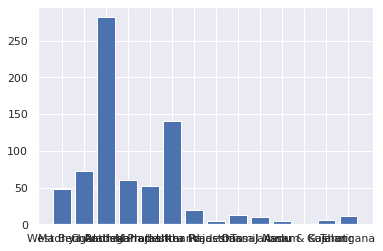

Plot for month vs accidents


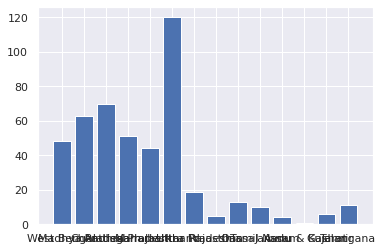

Heatmap for class of accidents vs month with the death counts.


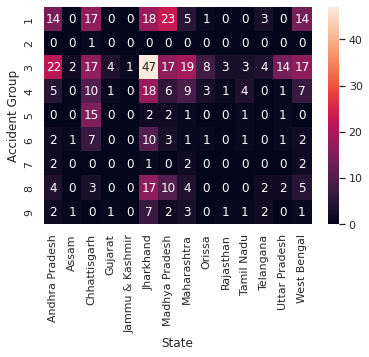

In [ ]:
state_vs_death = {x:0 for x in data['State'].unique()}
state_vs_accidents = {x:0 for x in data['State'].unique()}
temp1 = np.array(data['State'])
temp2 = np.array(data['deaths'])
for i in range(len(data)):
  state_vs_death[temp1[i]] += temp2[i]
  state_vs_accidents[temp1[i]] += 1
print("Plot for date vs deaths")
plt.bar(list(state_vs_death.keys()), state_vs_death.values())
plt.show()
print("Plot for month vs accidents")
plt.bar(list(state_vs_accidents.keys()), state_vs_accidents.values())
plt.show()
print("Heatmap for class of accidents vs month with the death counts.")
pivot_table = pd.pivot_table(data=data, values='deaths', index='Accident Group', columns='State', aggfunc=len, fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='g')

Plot for date vs deaths


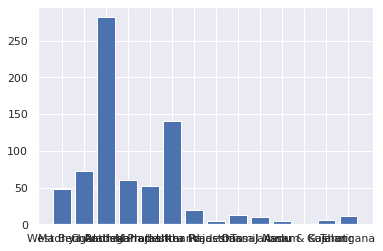

Plot for month vs accidents


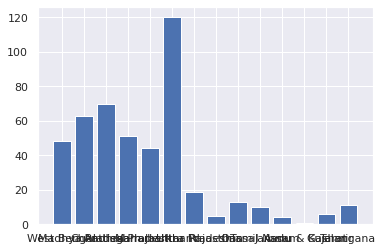

Heatmap for class of accidents vs month with the death counts.


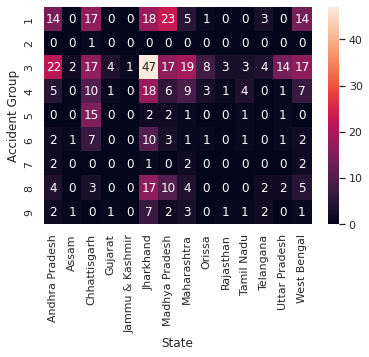

In [ ]:
state_vs_death = {x:0 for x in data['State'].unique()}
state_vs_accidents = {x:0 for x in data['State'].unique()}
temp1 = np.array(data['State'])
temp2 = np.array(data['deaths'])
for i in range(len(data)):
  state_vs_death[temp1[i]] += temp2[i]
  state_vs_accidents[temp1[i]] += 1
print("Plot for date vs deaths")
plt.bar(list(state_vs_death.keys()), state_vs_death.values())
plt.show()
print("Plot for month vs accidents")
plt.bar(list(state_vs_accidents.keys()), state_vs_accidents.values())
plt.show()
print("Heatmap for class of accidents vs month with the death counts.")
pivot_table = pd.pivot_table(data=data, values='deaths', index='Accident Group', columns='State', aggfunc=len, fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='g')

In [ ]:
# Occupation has too many unique values

Plot for age vs deaths


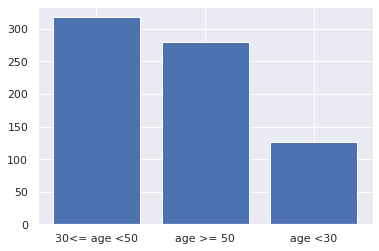

Plot for age vs accidents


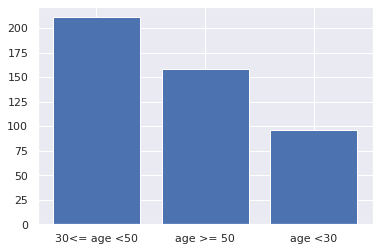

Heatmap for class of accidents vs month with the death counts.


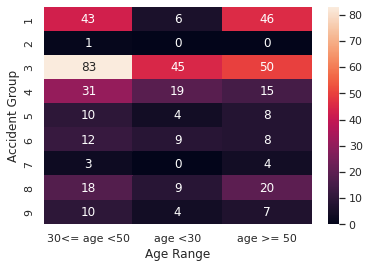

In [ ]:
age_vs_death = {x:0 for x in data['Age Range'].unique()}
age_vs_accidents = {x:0 for x in data['Age Range'].unique()}
temp1 = np.array(data['Age Range'])
temp2 = np.array(data['deaths'])
for i in range(len(data)):
  age_vs_death[temp1[i]] += temp2[i]
  age_vs_accidents[temp1[i]] += 1
print("Plot for age vs deaths")
plt.bar(list(age_vs_death.keys()), age_vs_death.values())
plt.show()
print("Plot for age vs accidents")
plt.bar(list(age_vs_accidents.keys()), age_vs_accidents.values())
plt.show()
print("Heatmap for class of accidents vs month with the death counts.")
pivot_table = pd.pivot_table(data=data, values='deaths', index='Accident Group', columns='Age Range', aggfunc=len, fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='g')

Plot for shift vs deaths


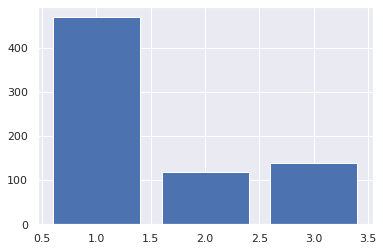

Plot for shift vs accidents


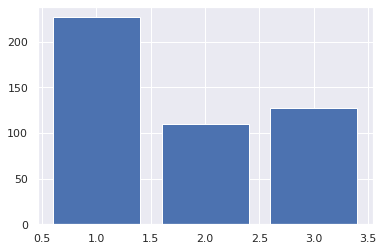

Heatmap for class of accidents vs month with the death counts.


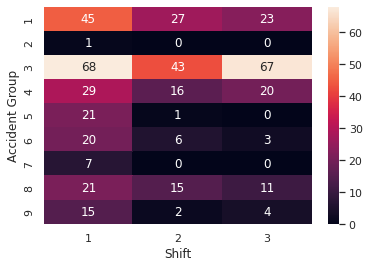

In [ ]:
Shift_vs_death = {x:0 for x in data['Shift'].unique()}
Shift_vs_accidents = {x:0 for x in data['Shift'].unique()}
temp1 = np.array(data['Shift'])
temp2 = np.array(data['deaths'])
for i in range(len(data)):
  Shift_vs_death[temp1[i]] += temp2[i]
  Shift_vs_accidents[temp1[i]] += 1
print("Plot for shift vs deaths")
plt.bar(list(Shift_vs_death.keys()), Shift_vs_death.values())
plt.show()
print("Plot for shift vs accidents")
plt.bar(list(Shift_vs_accidents.keys()), Shift_vs_accidents.values())
plt.show()
print("Heatmap for class of accidents vs month with the death counts.")
pivot_table = pd.pivot_table(data=data, values='deaths', index='Accident Group', columns='Shift', aggfunc=len, fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='g')

Plot for subshift vs deaths


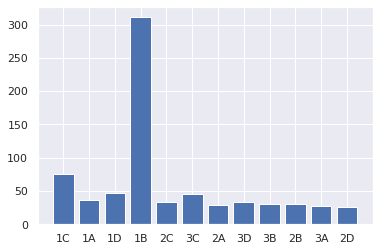

Plot for subshift vs accidents


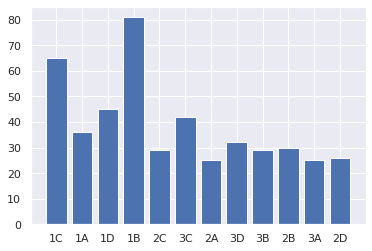

Heatmap for class of accidents vs month with the death counts.


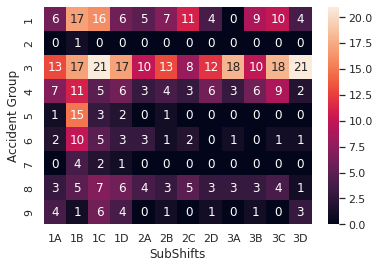

In [ ]:
Shift_vs_death = {x:0 for x in data['SubShifts'].unique()}
Shift_vs_accidents = {x:0 for x in data['SubShifts'].unique()}
temp1 = np.array(data['SubShifts'])
temp2 = np.array(data['deaths'])
for i in range(len(data)):
  Shift_vs_death[temp1[i]] += temp2[i]
  Shift_vs_accidents[temp1[i]] += 1
print("Plot for subshift vs deaths")
plt.bar(list(Shift_vs_death.keys()), Shift_vs_death.values())
plt.show()
print("Plot for subshift vs accidents")
plt.bar(list(Shift_vs_accidents.keys()), Shift_vs_accidents.values())
plt.show()
print("Heatmap for class of accidents vs SubShifts with the death counts.")
pivot_table = pd.pivot_table(data=data, values='deaths', index='Accident Group', columns='SubShifts', aggfunc=len, fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='g')

Heatmap for class of age vs shift with the death counts.


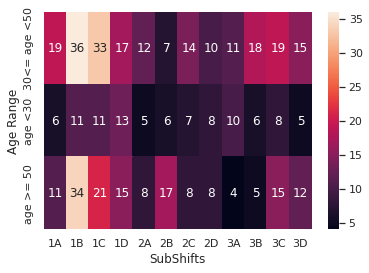

In [ ]:
print("Heatmap for class of age vs shift with the death counts.")
pivot_table = pd.pivot_table(data=data, values='deaths', index='Age Range', columns='SubShifts', aggfunc=len, fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='g')

In [ ]:
print(data.columns)

Index(['Accident Code', 'Accident Reason', 'Date', 'State', 'Mine', 'District',
       'Owner Company', 'Occupation of the person', 'Age of the person',
       'Age Range', 'Reason', 'Remedy', 'Shift', 'SubShifts', 'deaths',
       'Accident Group', 'Month', 'Day'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing 

col = {'Age Range', 'SubShifts', 'Month', 'Day', 'Occupation of the person'}
X = data[col]
y = data['Accident Group']
le = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
X['Age Range'] = le.fit_transform(X['Age Range'])
X['SubShifts'] = le1.fit_transform(X['SubShifts'])
X['Occupation of the person'] = le1.fit_transform(X['Occupation of the person'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X, y = make_classification(n_samples=1000, n_features=3,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

<ipython-input-421-72766ea8ba27>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age Range'] = le.fit_transform(X['Age Range'])
<ipython-input-421-72766ea8ba27>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SubShifts'] = le1.fit_transform(X['SubShifts'])
<ipython-input-421-72766ea8ba27>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

0.3548387096774194